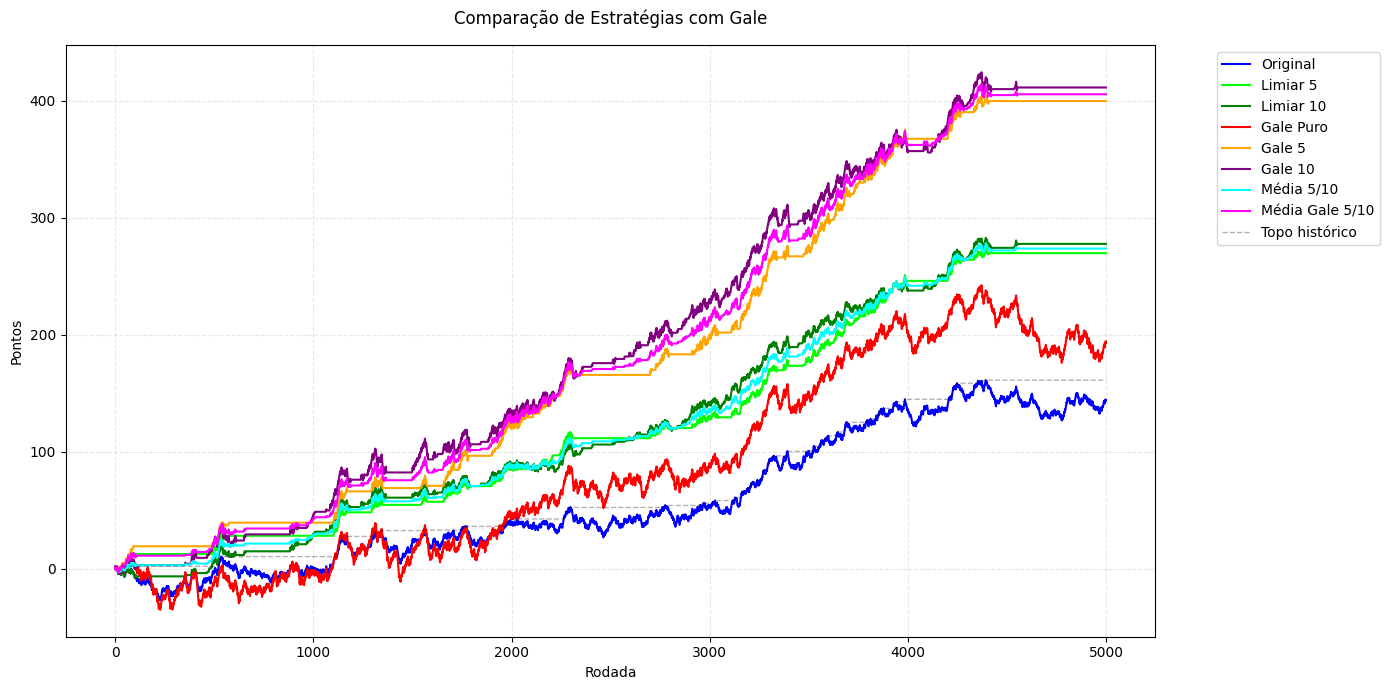

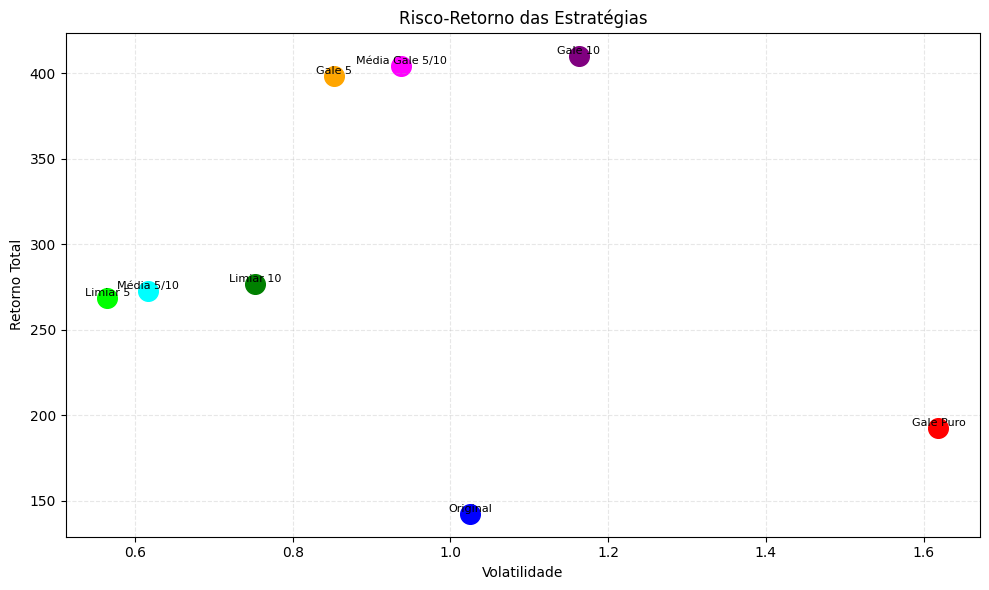

In [1]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale Puro': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'ultima_perda': False},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'ultima_perda': False},
    'Gale 10': {'pontos': 0, 'evolucao': [], 'cor': 'purple', 'ultima_perda': False}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            aplicar_gale = True
            # Verifica se está dentro do limiar para as estratégias com limiar
            if nome in ['Gale 5', 'Gale 10']:
                limiar = int(nome.split()[-1])
                diferenca = topo_historico[-1] - pontos
                aplicar_gale = (diferenca <= limiar)

            if aplicar_gale:
                if dados['ultima_perda']:
                    dados['pontos'] += ponto_cara * 2 if resultado < 0.5 else ponto_coroa * 2
                    dados['ultima_perda'] = (resultado >= 0.5)
                else:
                    dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
                    dados['ultima_perda'] = (resultado >= 0.5)
            else:
                dados['pontos'] += 0  # Fora do limiar, não opera

            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias com limiar simples
        limiar = int(nome.split()[-1])
        diferenca = topo_historico[-1] - pontos

        if diferenca <= limiar:
            dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

        dados['evolucao'].append(dados['pontos'])

# Cálculo das médias
media_limiares = np.mean([estrategias['Limiar 5']['evolucao'], estrategias['Limiar 10']['evolucao']], axis=0)
media_gale_limiares = np.mean([estrategias['Gale 5']['evolucao'], estrategias['Gale 10']['evolucao']], axis=0)

estrategias['Média 5/10'] = {'evolucao': media_limiares.tolist(), 'cor': 'cyan'}
estrategias['Média Gale 5/10'] = {'evolucao': media_gale_limiares.tolist(), 'cor': 'magenta'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome in ['Original', 'Limiar 5', 'Limiar 10', 'Gale Puro', 'Gale 5', 'Gale 10', 'Média 5/10', 'Média Gale 5/10']:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Gale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ['Original', 'Limiar 5', 'Limiar 10', 'Gale Puro', 'Gale 5', 'Gale 10', 'Média 5/10', 'Média Gale 5/10']:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

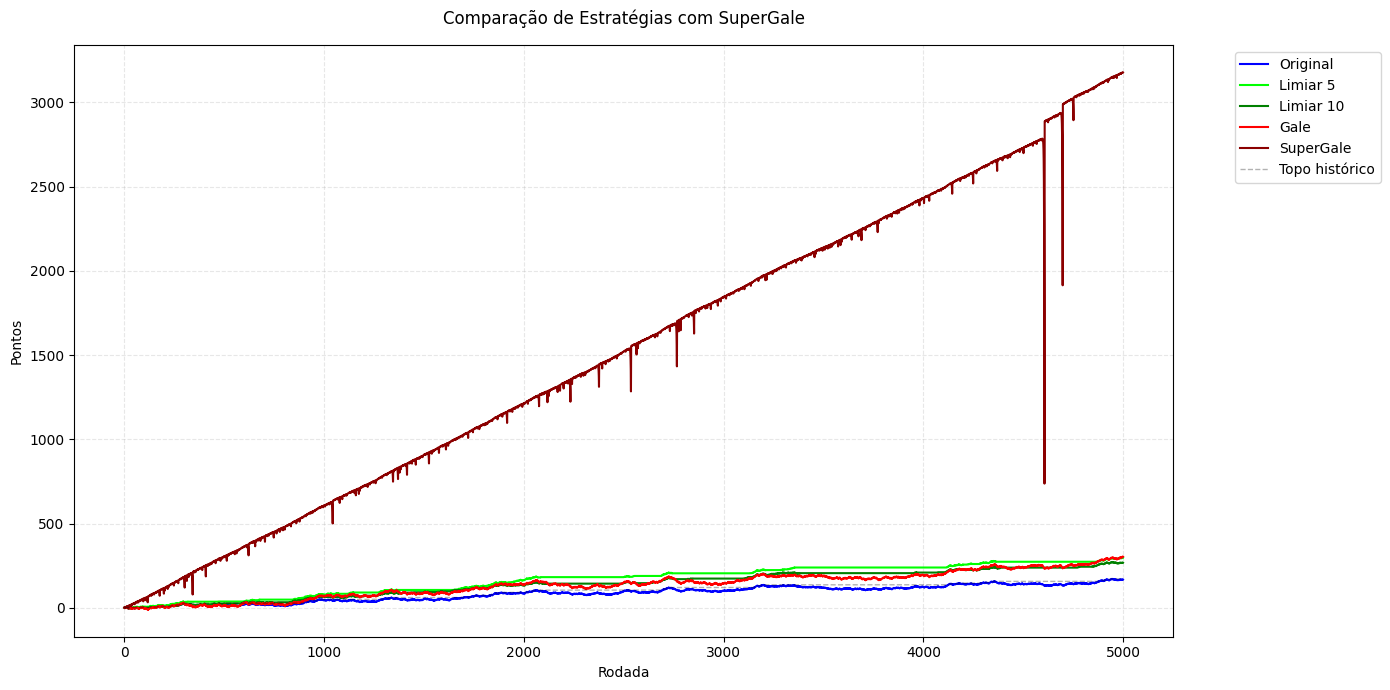

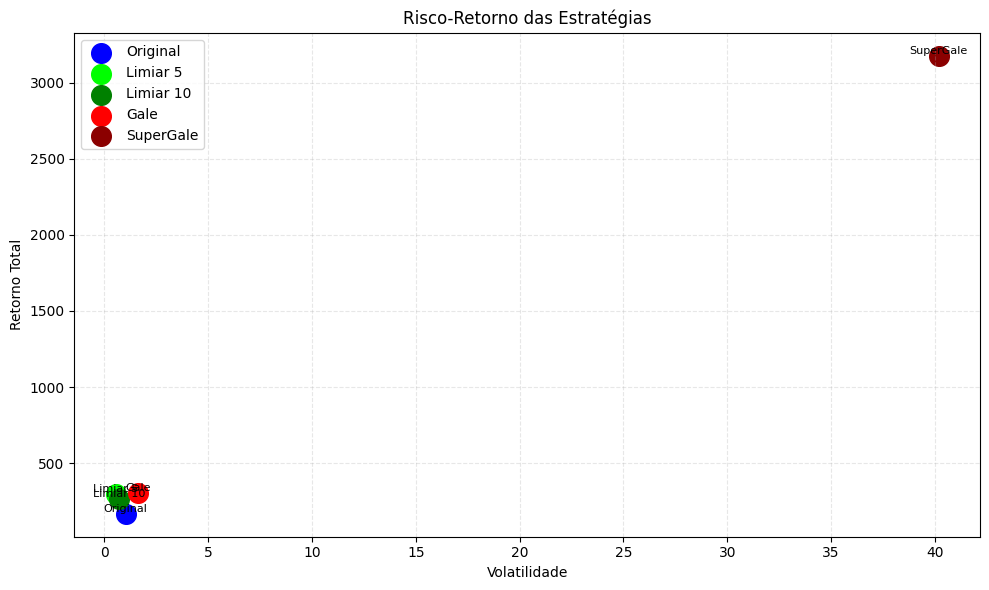

In [2]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

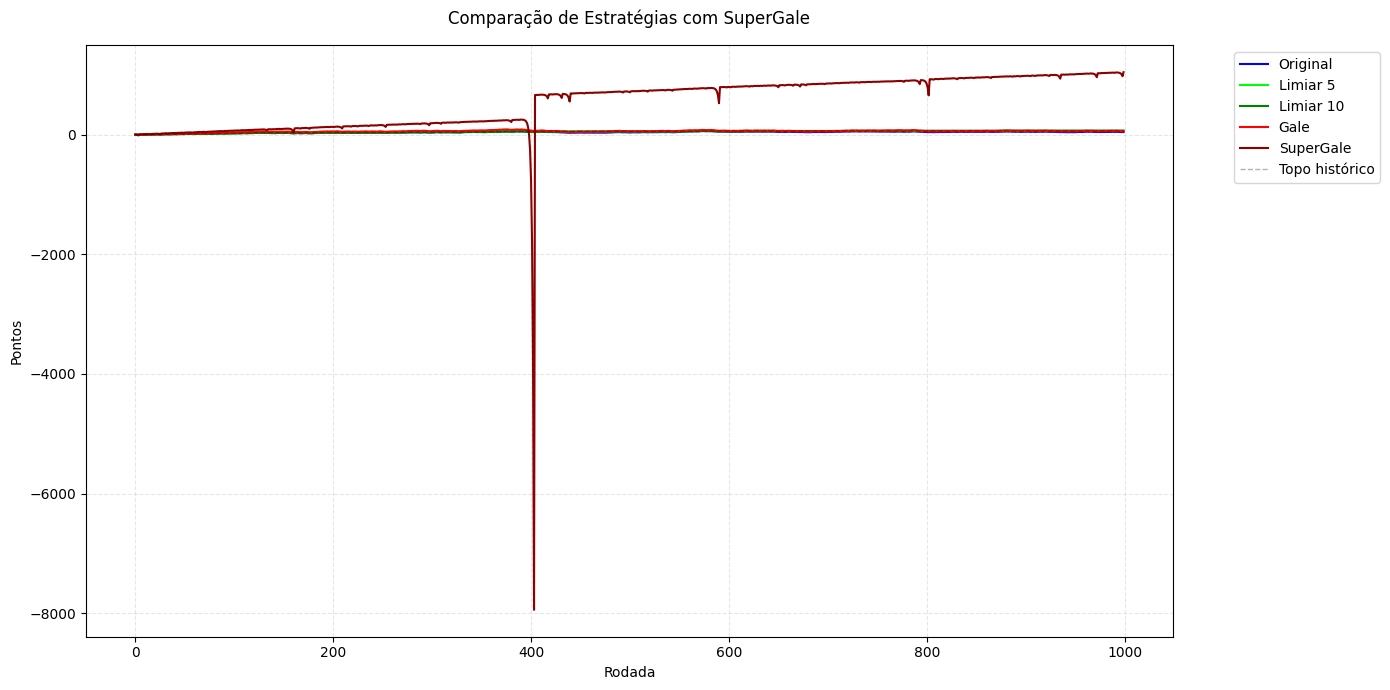

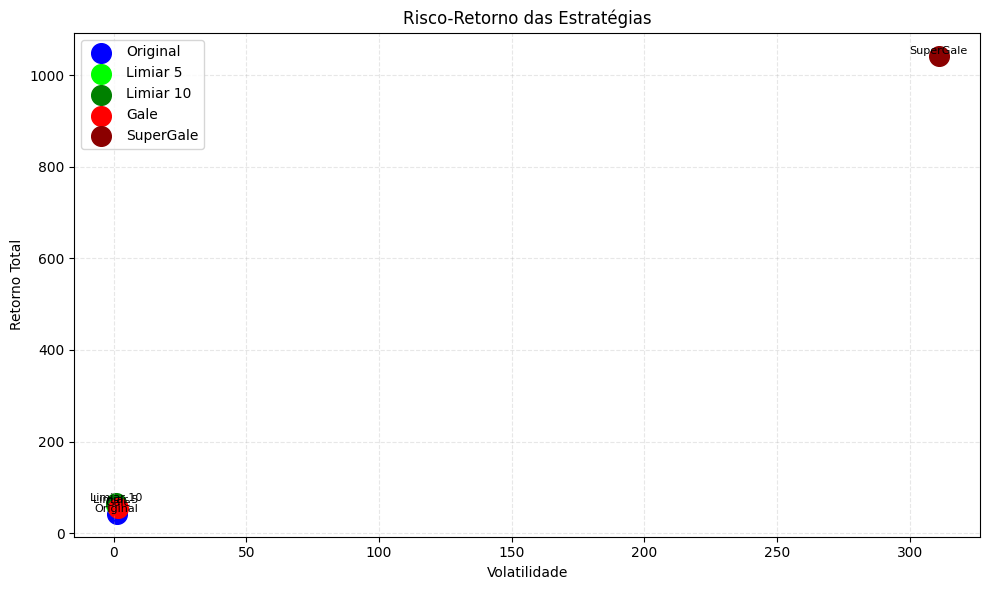

In [3]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 1000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

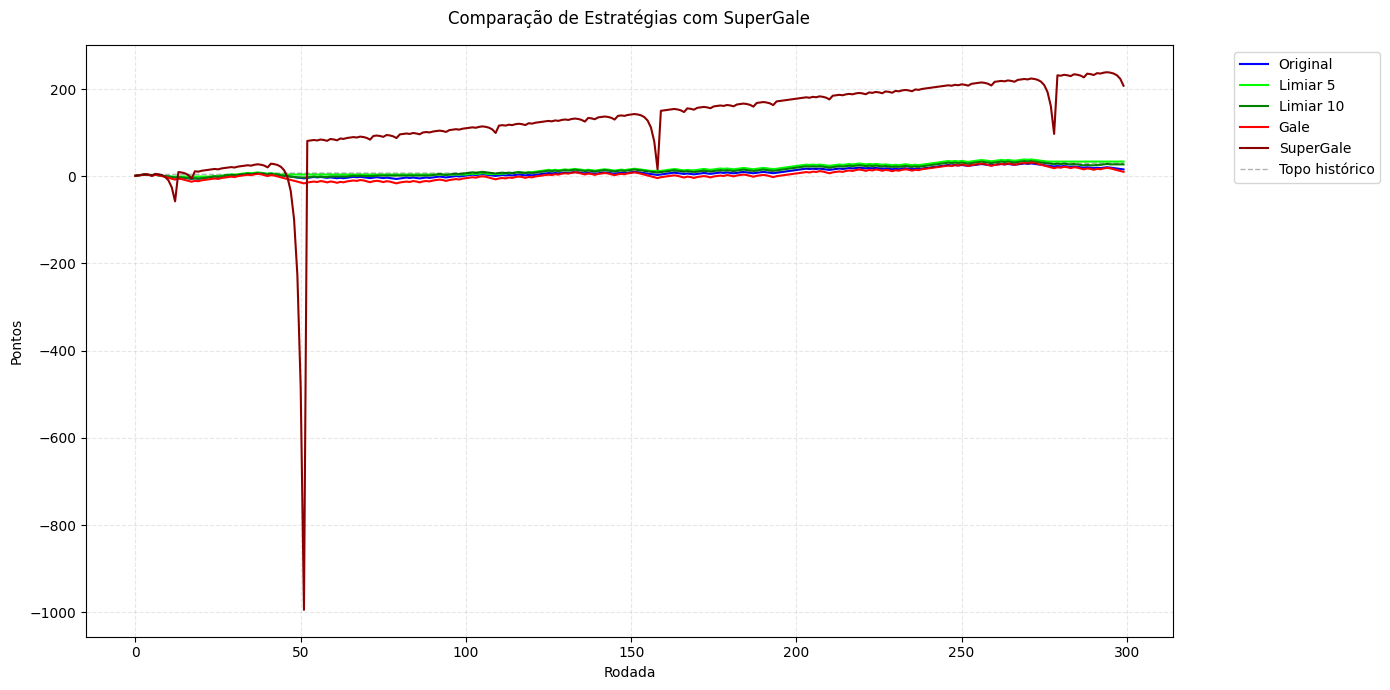

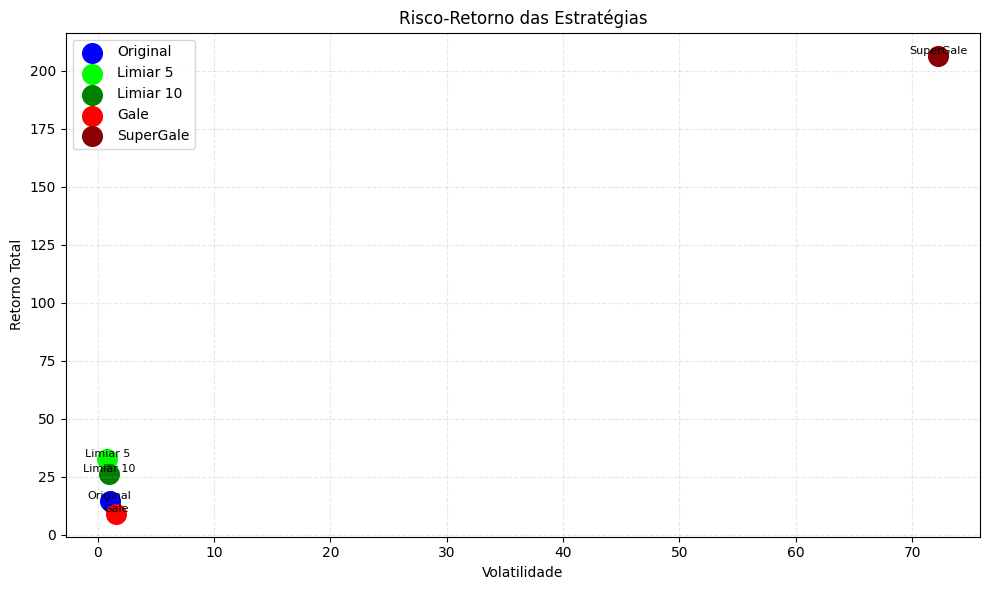

In [4]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 300
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

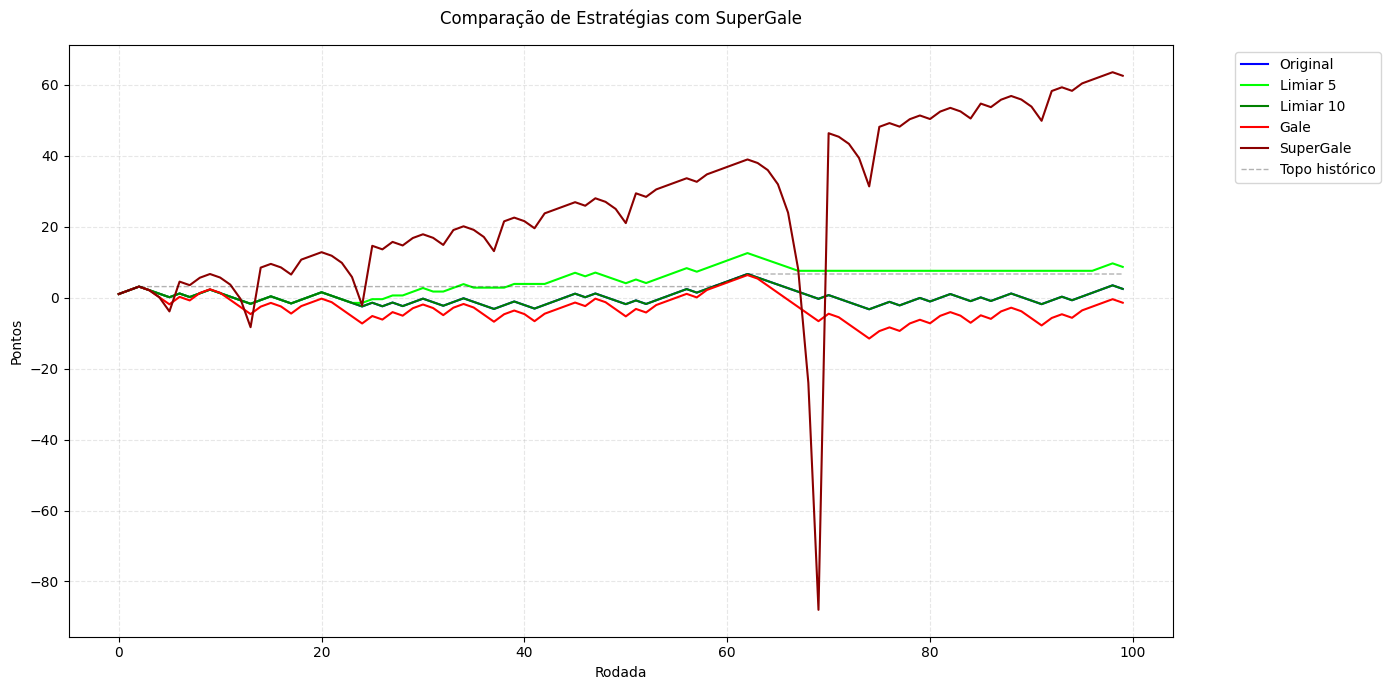

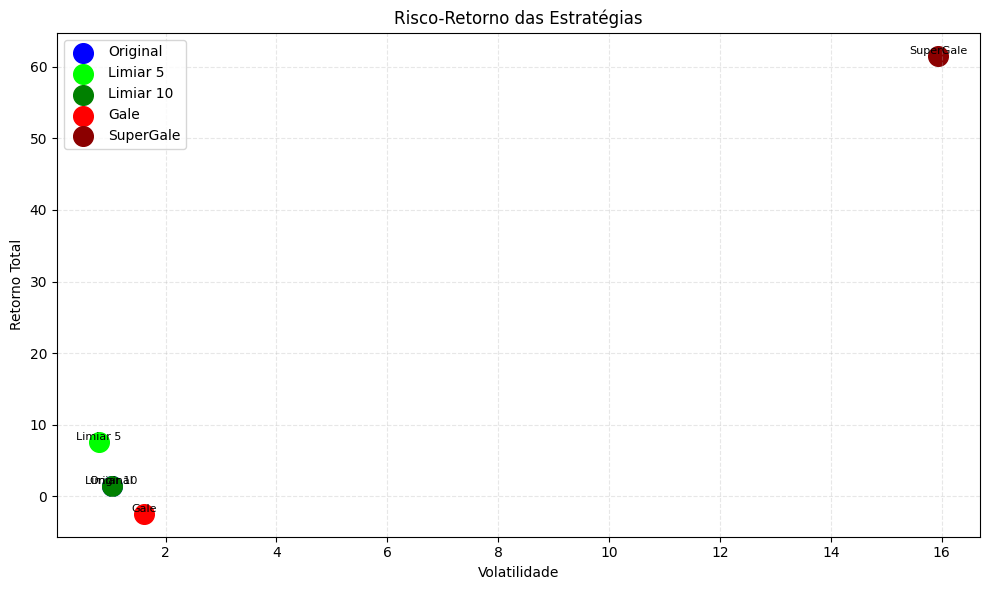

In [5]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 100
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

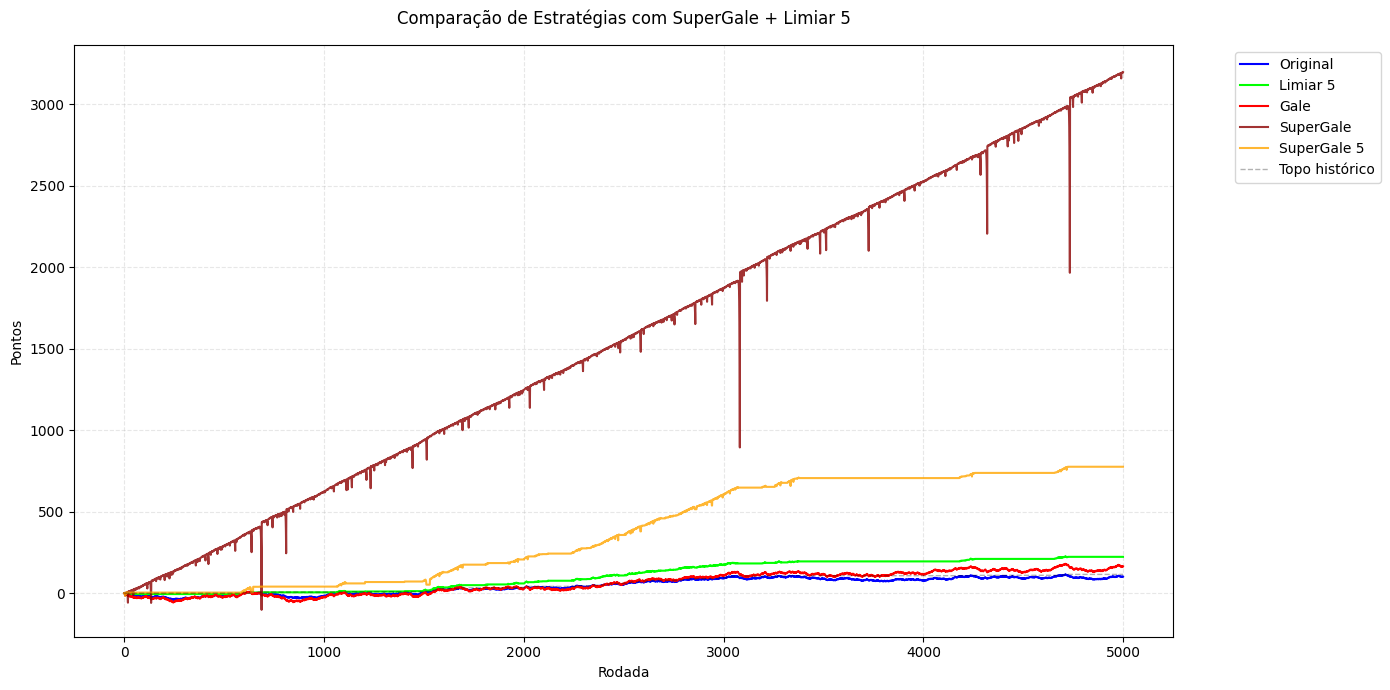

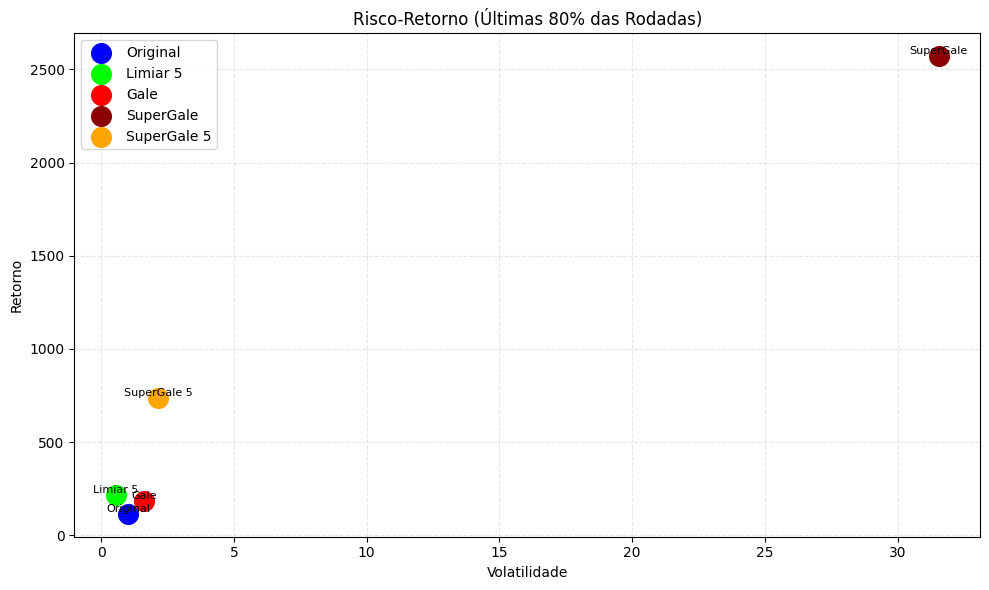

In [6]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 5:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale/SuperGale
        aplicar_estrategia = True
        if nome == 'SuperGale 5':
            diferenca = topo_historico[-1] - pontos
            aplicar_estrategia = (diferenca <= 5)

        if aplicar_estrategia:
            if 'Gale' in nome:
                if resultado < 0.5:  # Vitória
                    if nome == 'Gale':
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                    else:  # SuperGale
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                else:  # Derrota
                    if nome == 'Gale':
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
                    else:  # SuperGale
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])
        else:
            dados['evolucao'].append(dados['pontos'])  # Mantém os pontos sem operar

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.8 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale + Limiar 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimos 80% das rodadas para evitar viés inicial)
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]  # Descarta as primeiras 20%
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno (Últimas 80% das Rodadas)')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

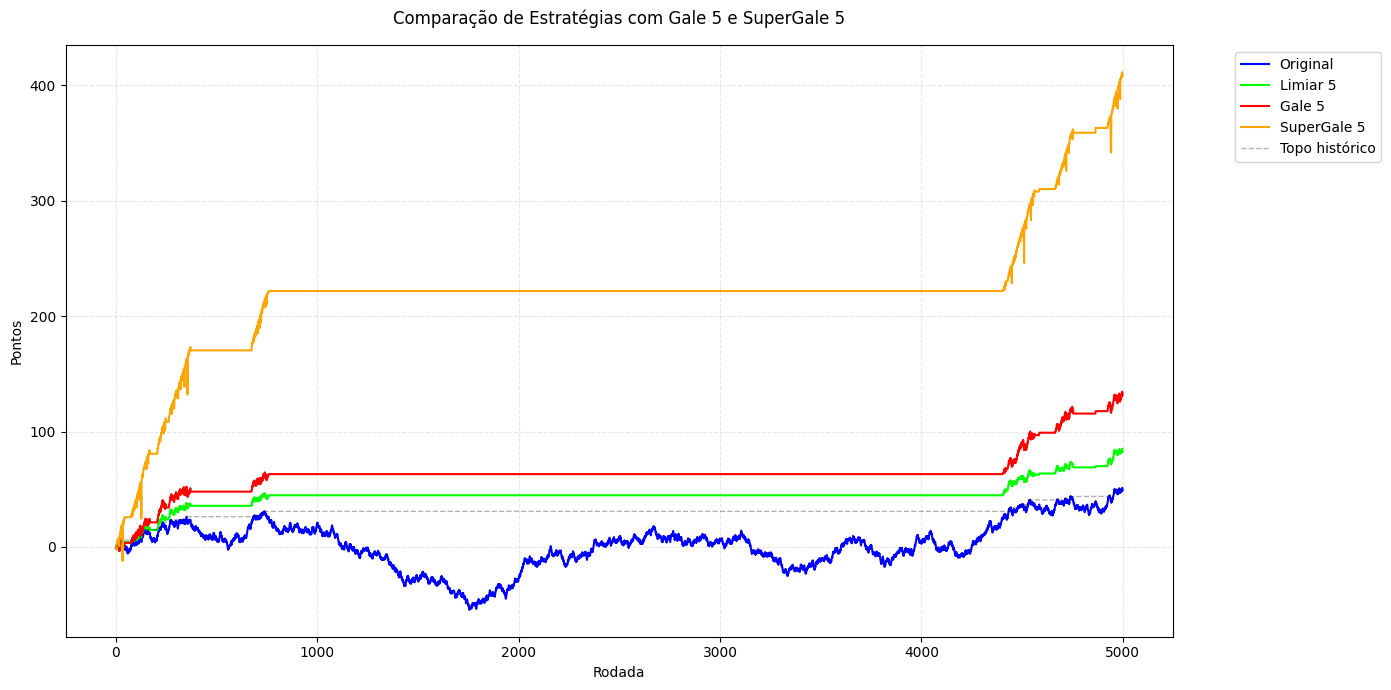

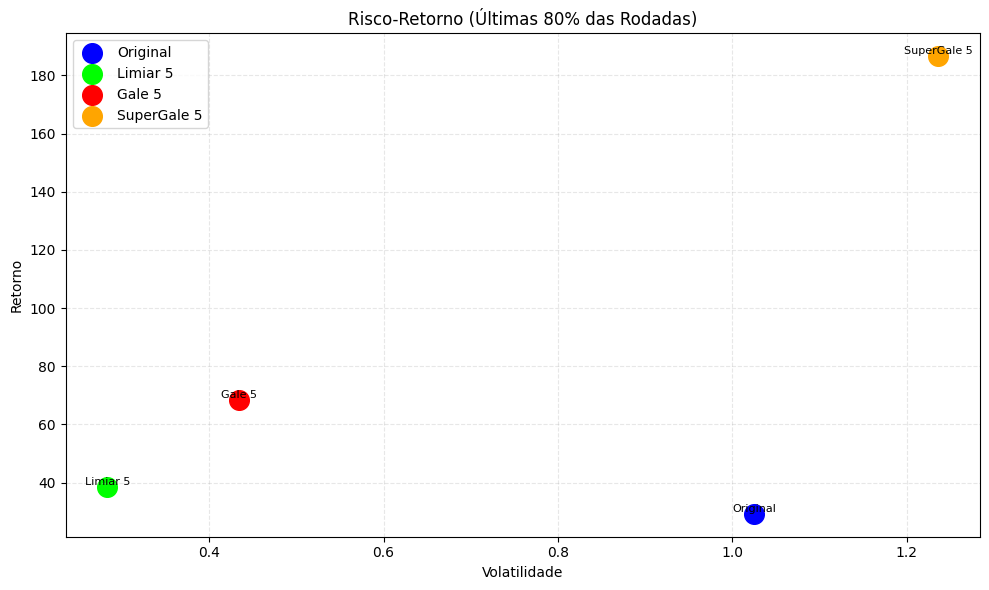

In [7]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 5:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Verifica o limiar para as estratégias Gale 5 e SuperGale 5
        diferenca = topo_historico[-1] - pontos
        if diferenca > 5:  # Fora do limiar, não opera
            dados['evolucao'].append(dados['pontos'])
            continue

        # Dentro do limiar - aplica a estratégia
        if nome == 'Gale 5':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra (máximo 1x)

        elif nome == 'SuperGale 5':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                dados['perdas_consec'] = 0  # Reseta
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                dados['perdas_consec'] += 1  # Incrementa perdas consecutivas

        dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Gale 5 e SuperGale 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]  # Remove viés inicial
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno (Últimas 80% das Rodadas)')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

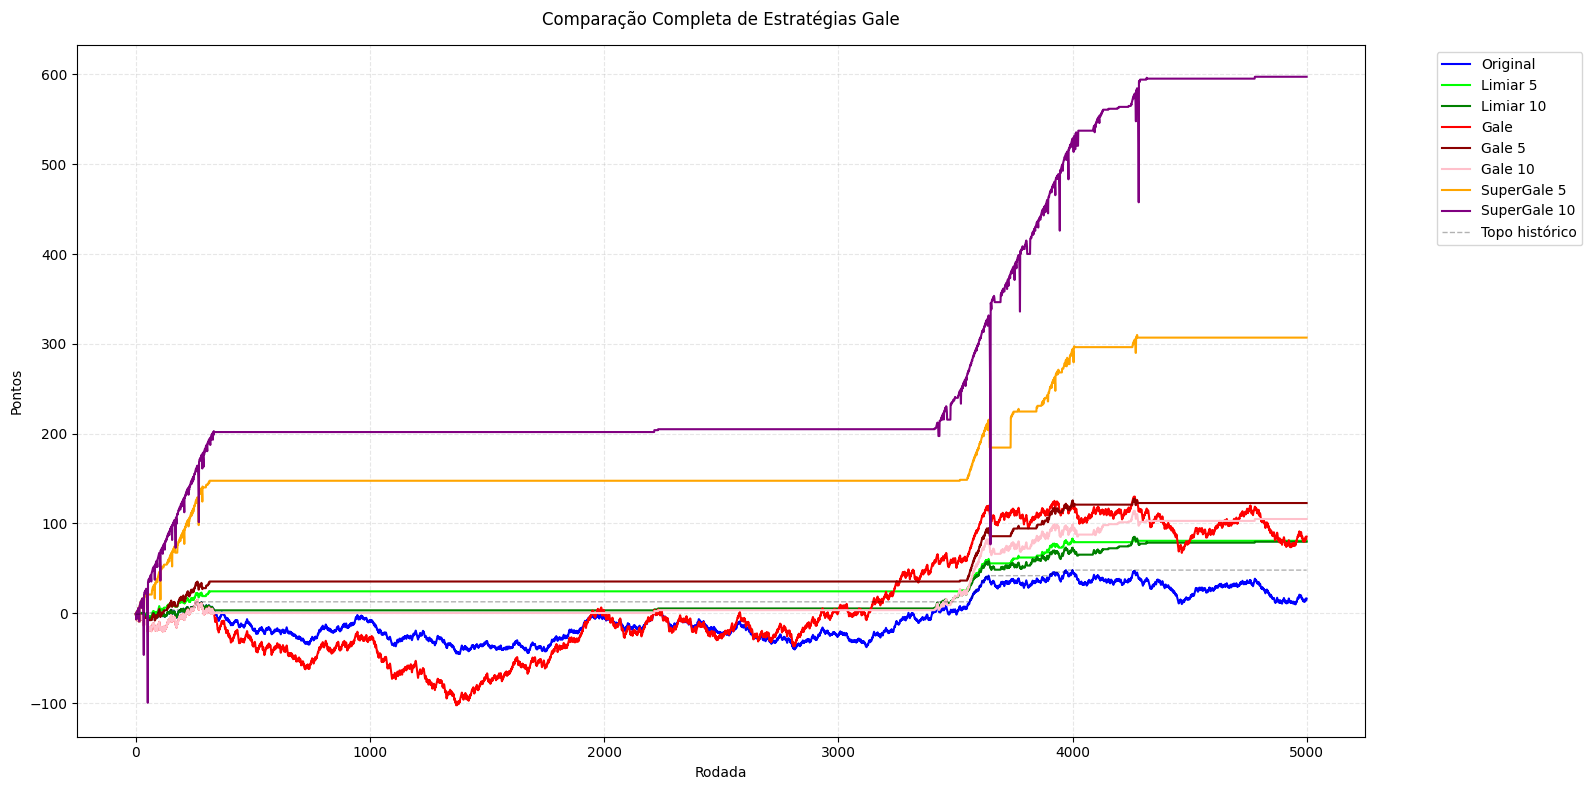

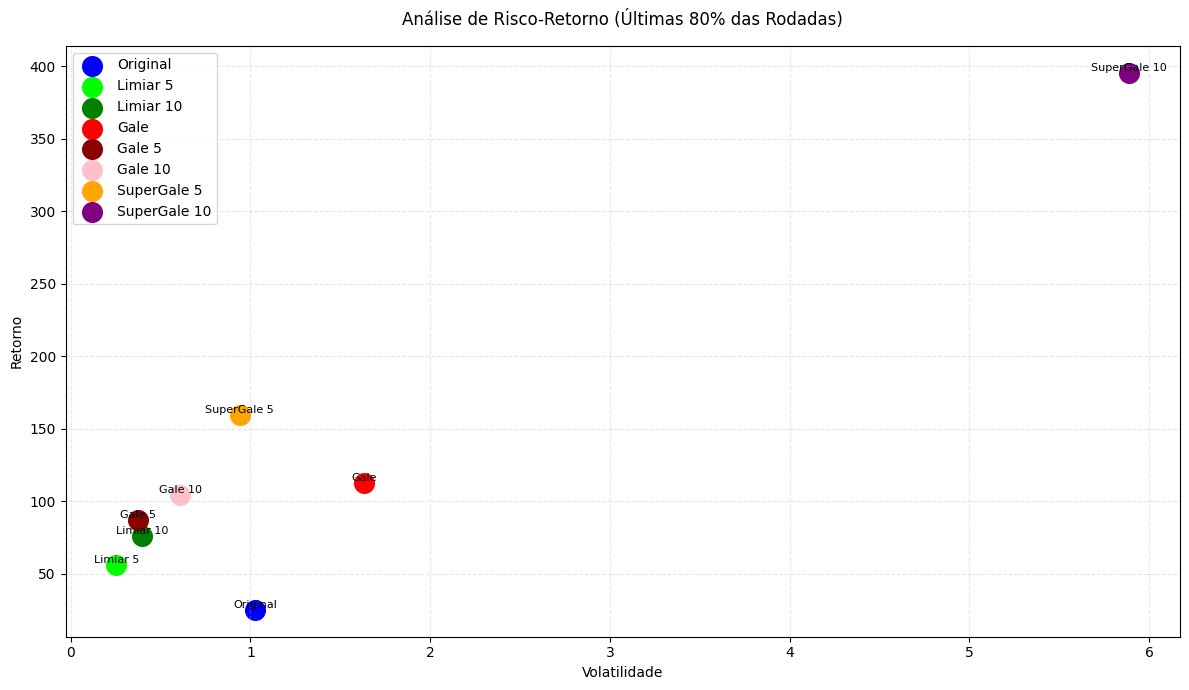

In [8]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'Gale 10': {'pontos': 0, 'evolucao': [], 'cor': 'pink', 'mult': 1},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0},
    'SuperGale 10': {'pontos': 0, 'evolucao': [], 'cor': 'purple', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 5', 'Limiar 10']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome in ['Gale 5', 'SuperGale 5']:
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome in ['Gale 10', 'SuperGale 10']:
                aplicar_estrategia = (topo_historico[-1] - pontos <= 10)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
cores_ordenadas = ['blue', 'lime', 'green', 'red', 'darkred', 'pink', 'orange', 'purple']
nomes_ordenados = ['Original', 'Limiar 5', 'Limiar 10', 'Gale', 'Gale 5', 'Gale 10', 'SuperGale 5', 'SuperGale 10']

for nome in nomes_ordenados:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação Completa de Estratégias Gale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in nomes_ordenados:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno (Últimas 80% das Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

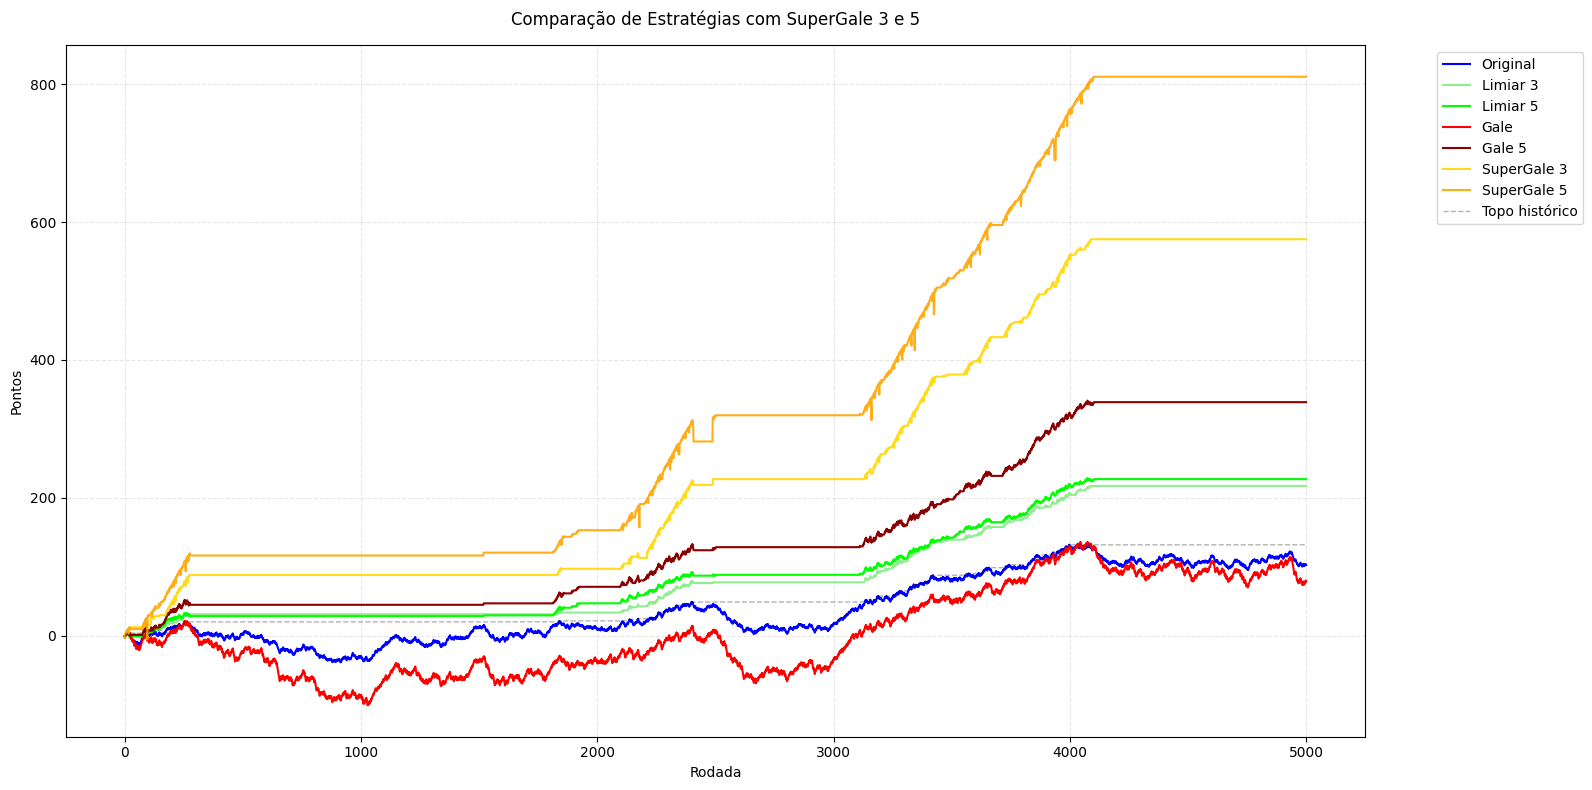

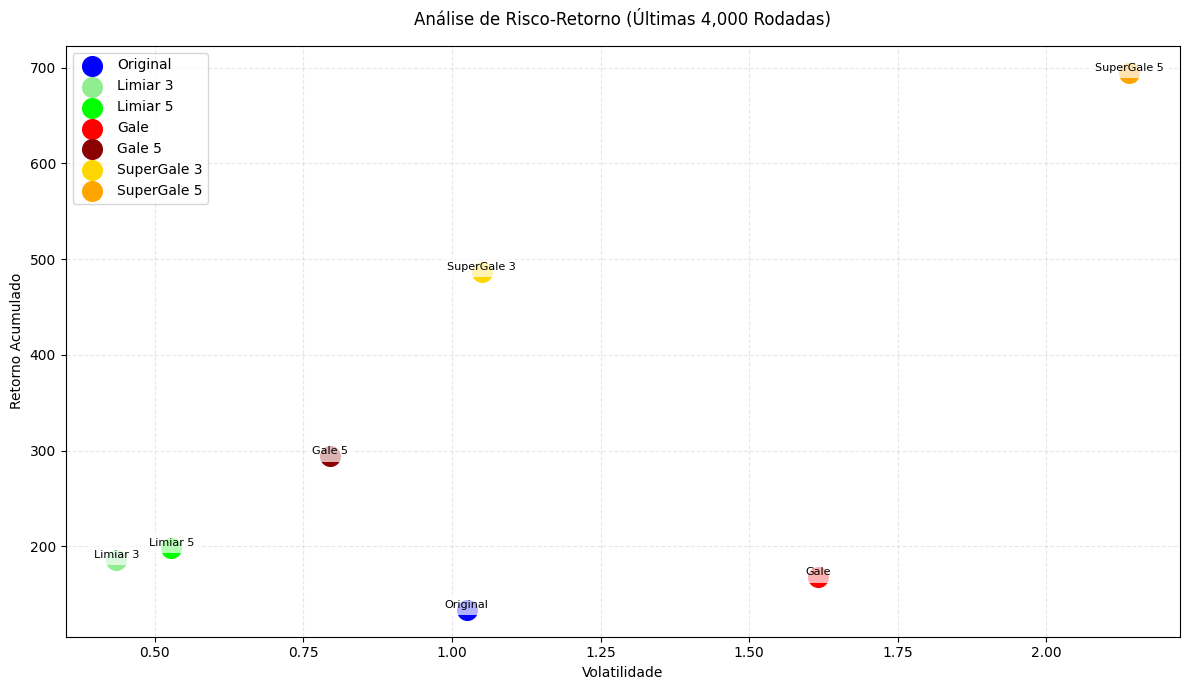

In [9]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 3', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 3', 'Limiar 5', 'Gale', 'Gale 5', 'SuperGale 3', 'SuperGale 5']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale 3 e 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 4,000 Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

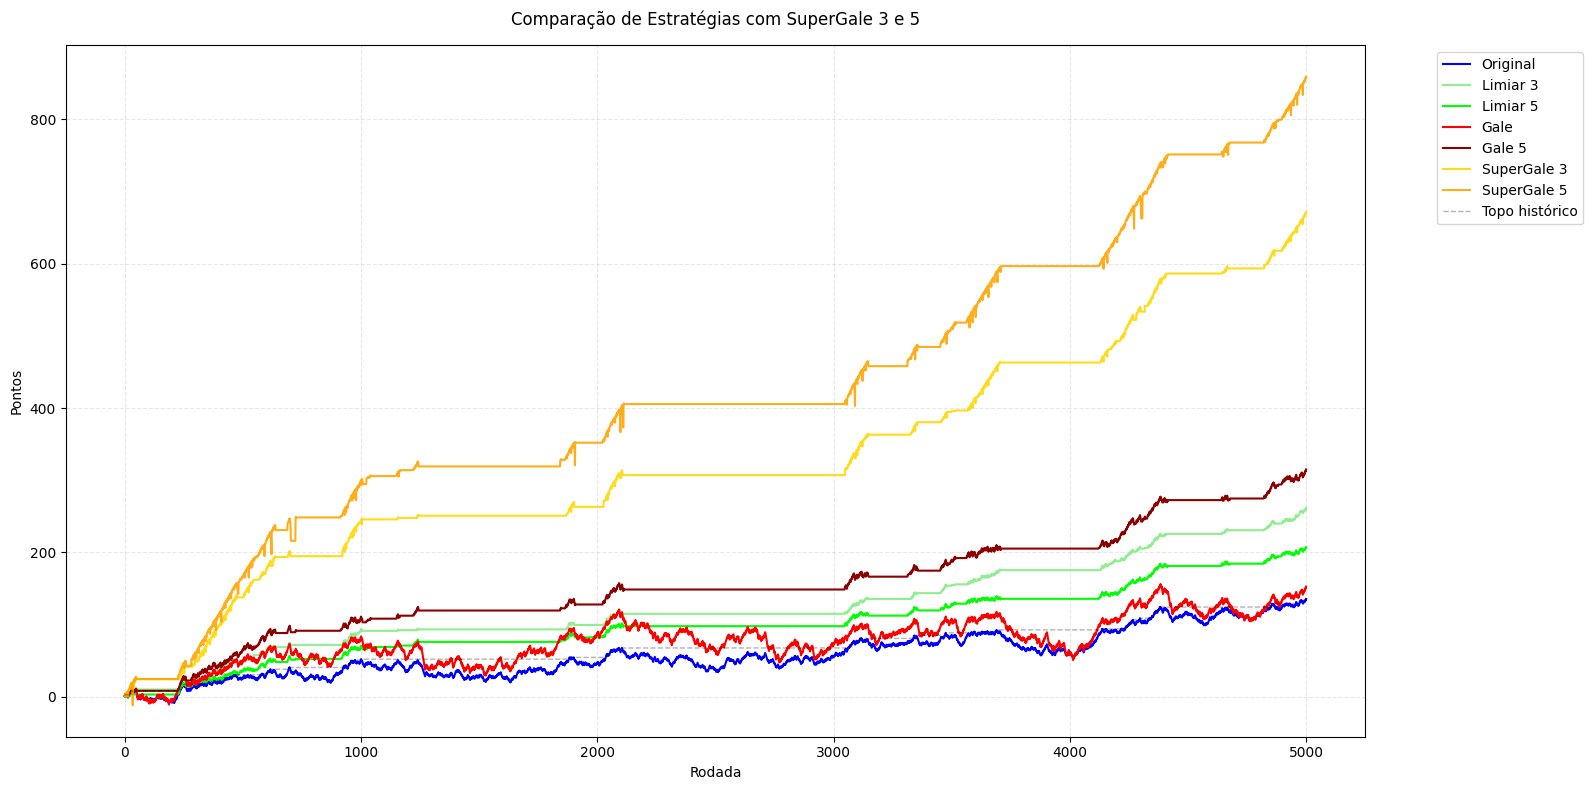

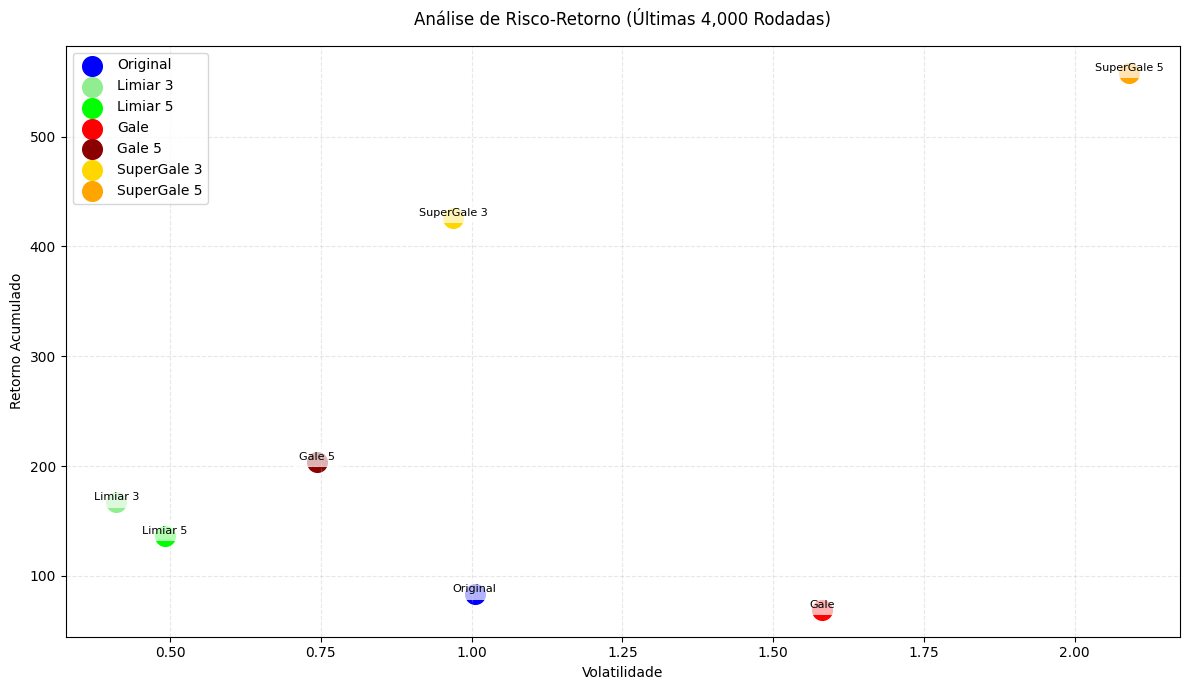

In [10]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.01
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 3', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 3', 'Limiar 5', 'Gale', 'Gale 5', 'SuperGale 3', 'SuperGale 5']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale 3 e 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 4,000 Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

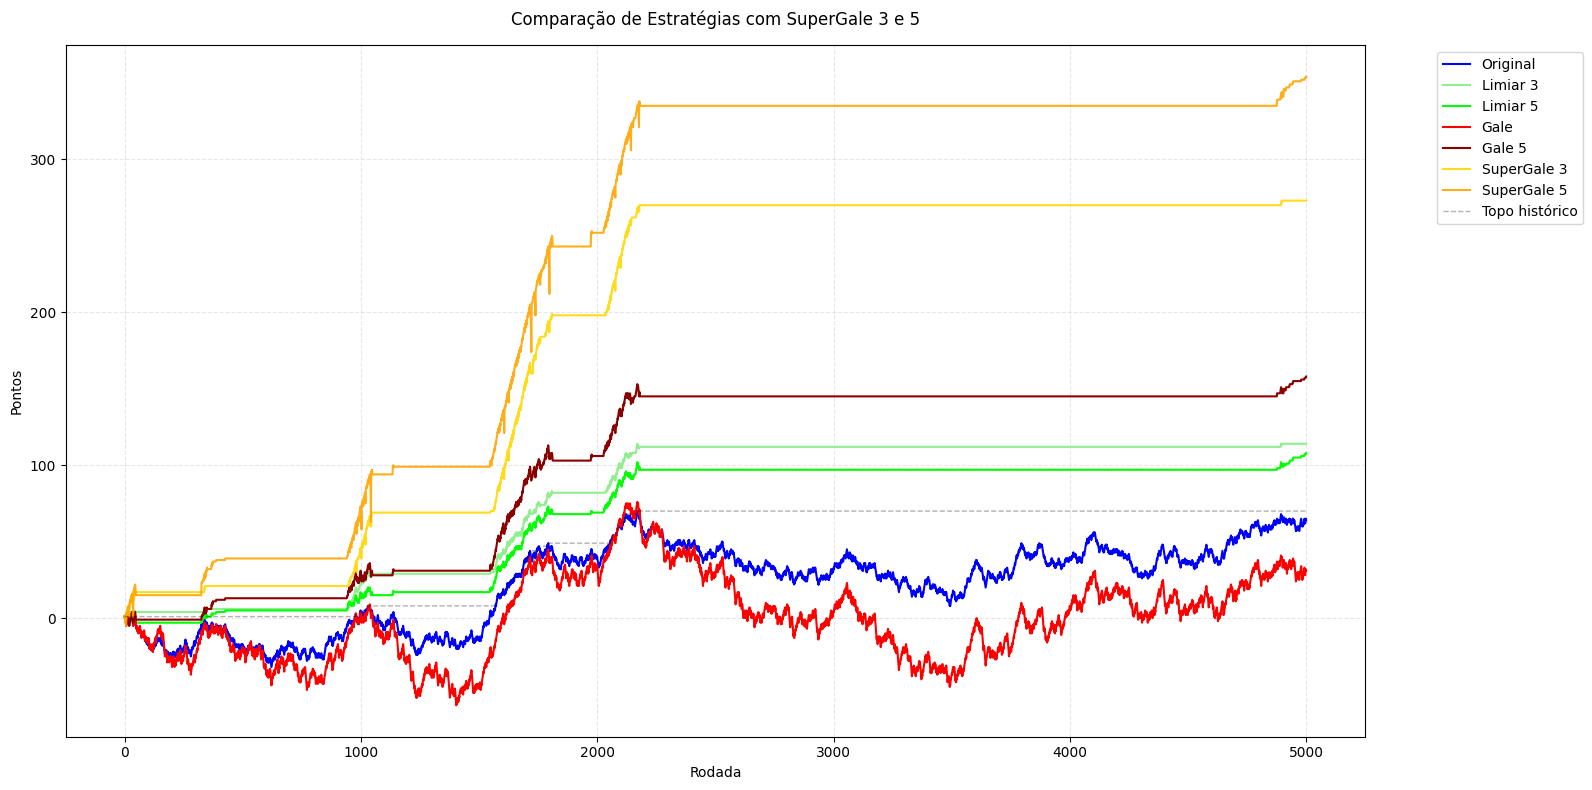

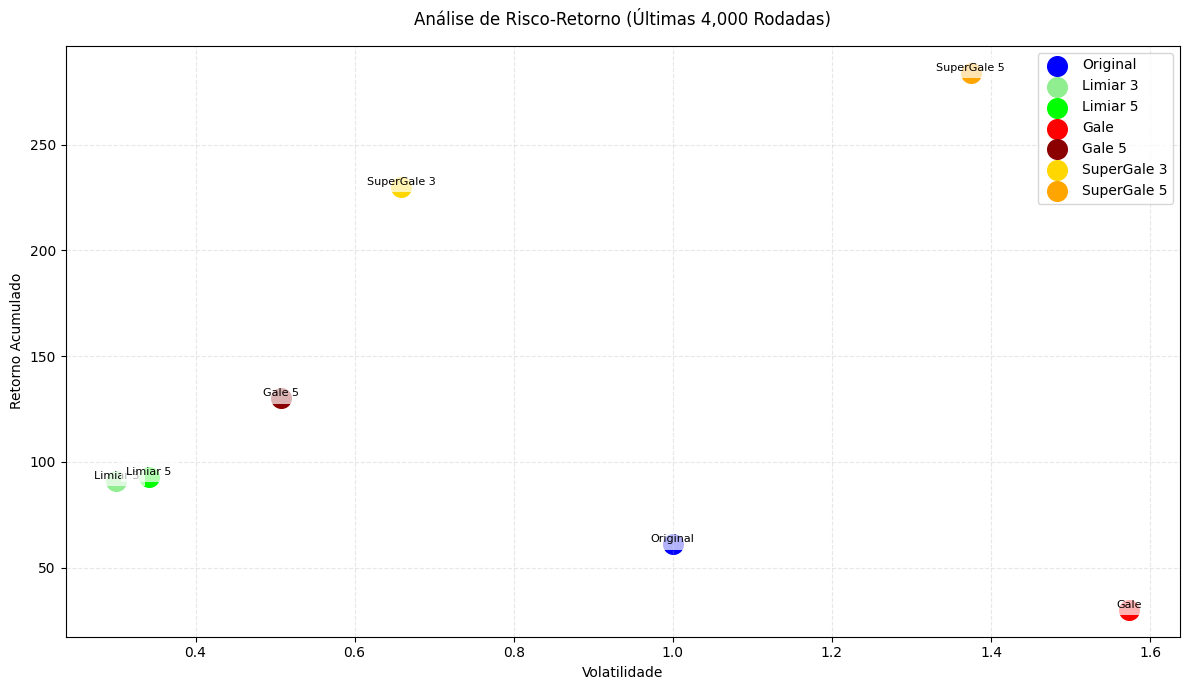

In [11]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 3', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 3', 'Limiar 5', 'Gale', 'Gale 5', 'SuperGale 3', 'SuperGale 5']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale 3 e 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 4,000 Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

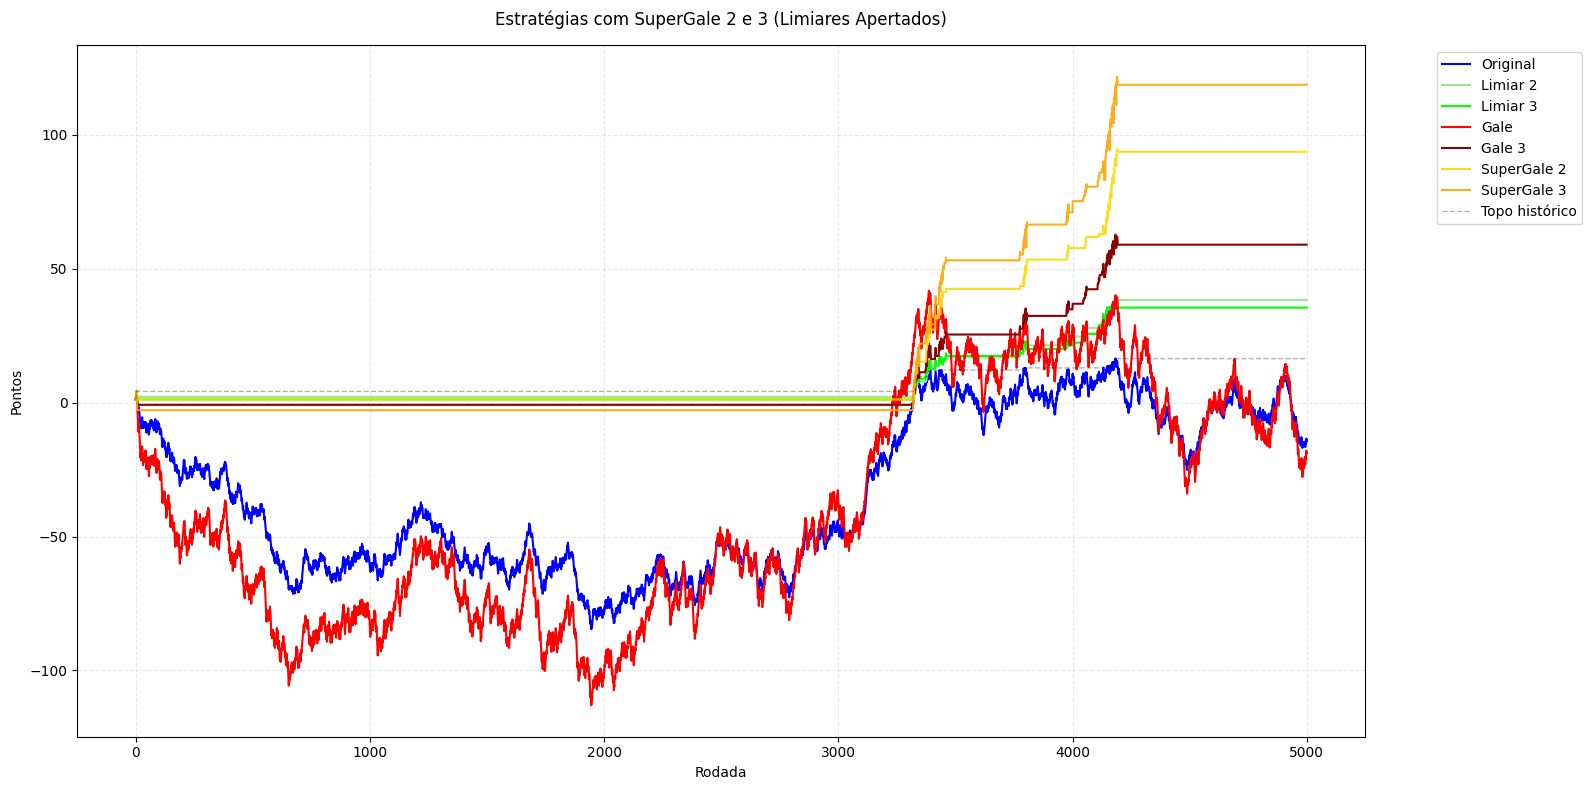

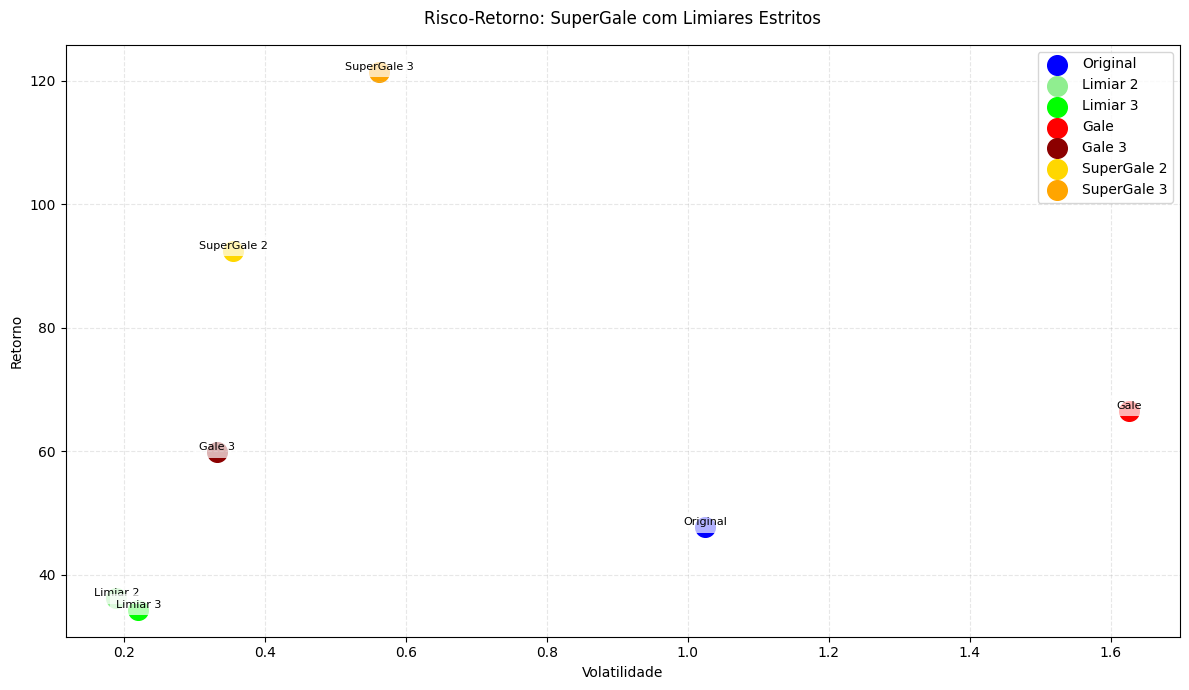

In [12]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

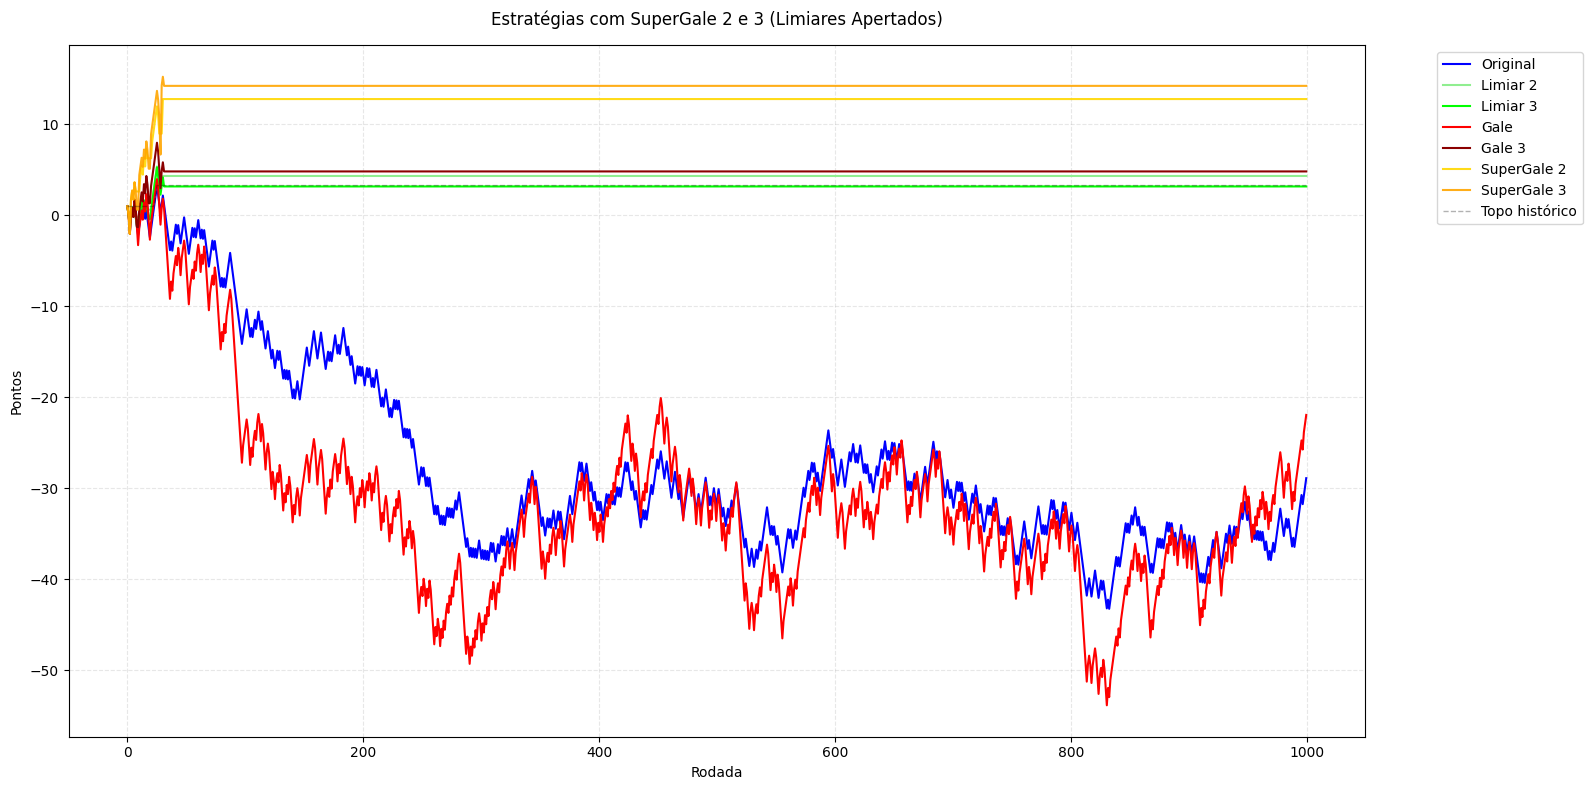

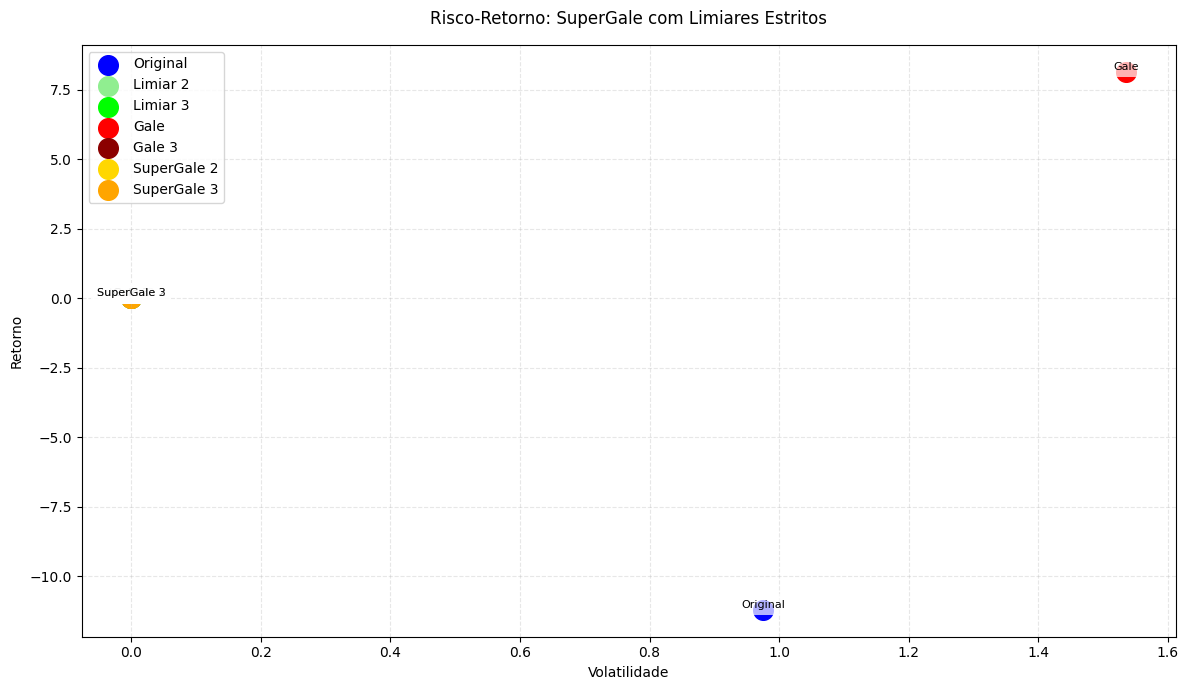

In [13]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 1000
ponto_cara = 0.95
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

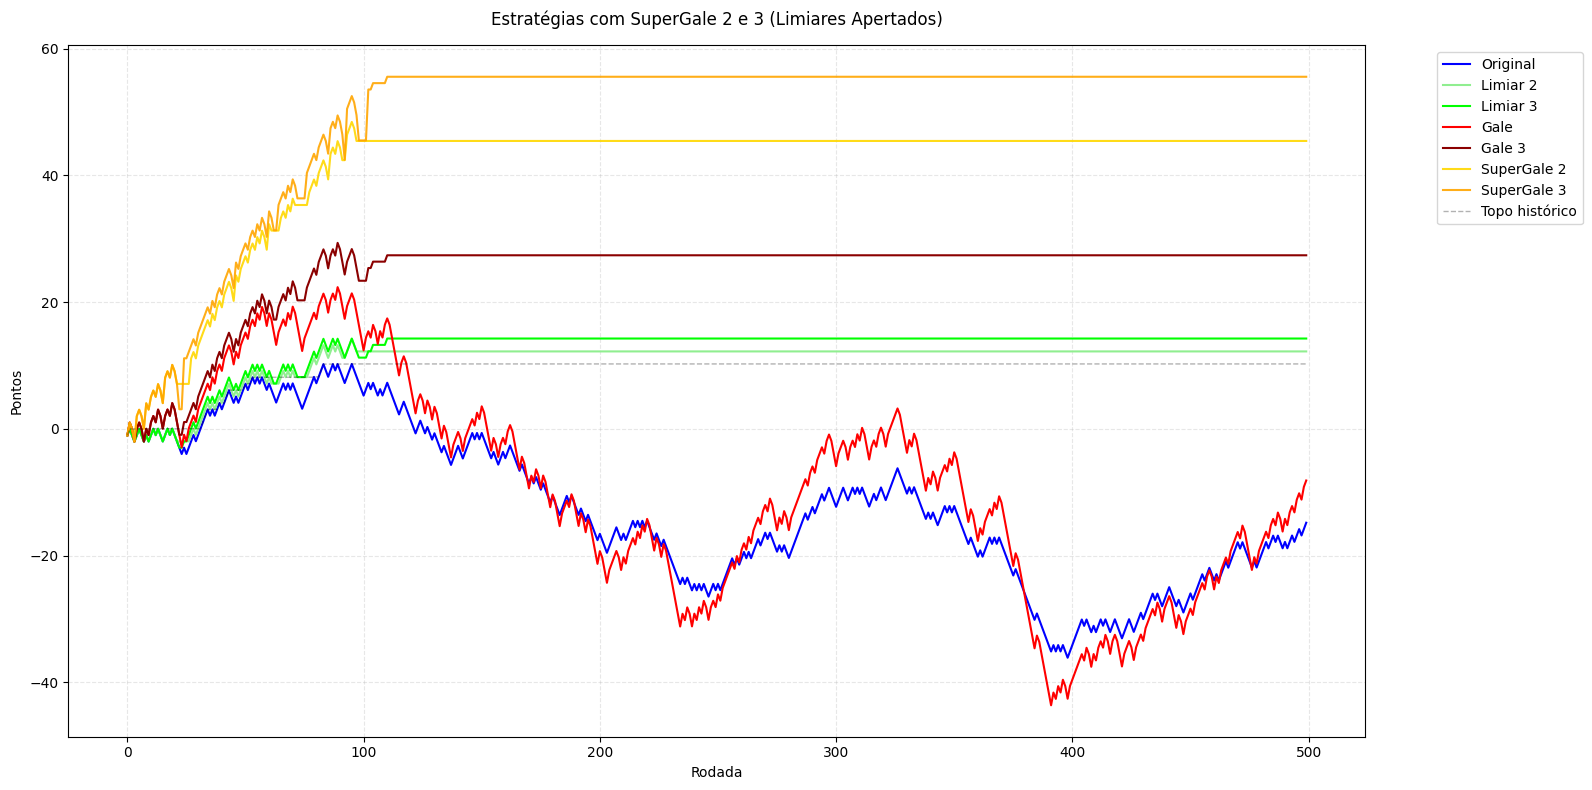

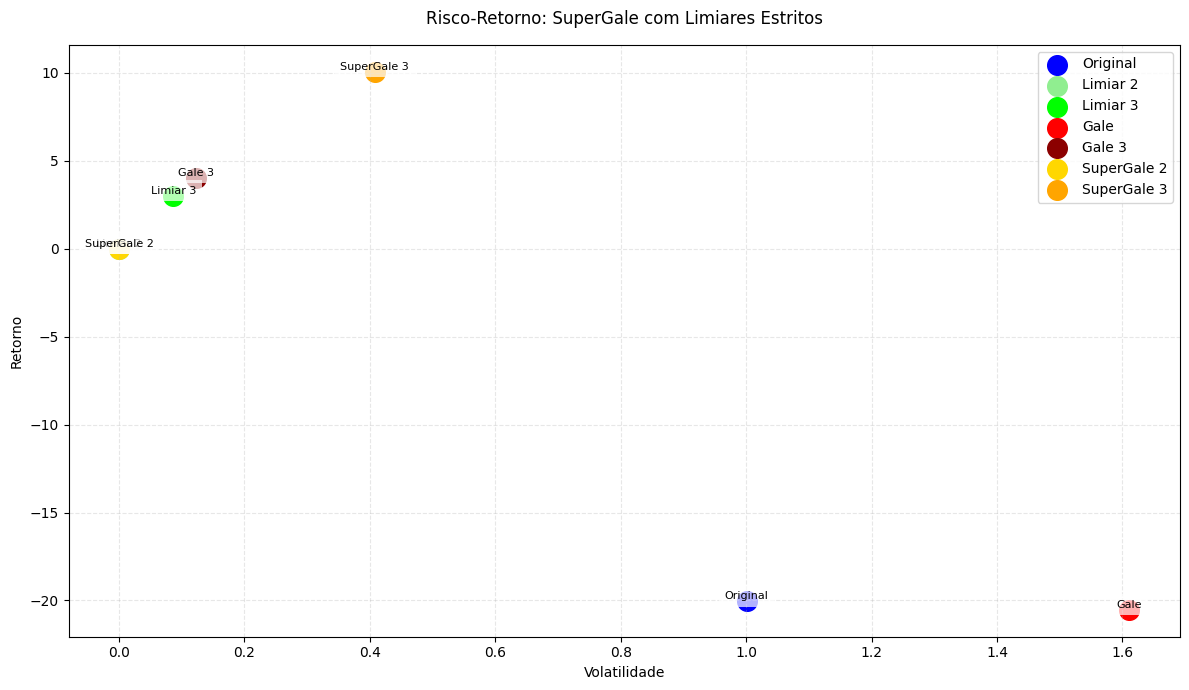

In [14]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 500
ponto_cara = 1.005
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

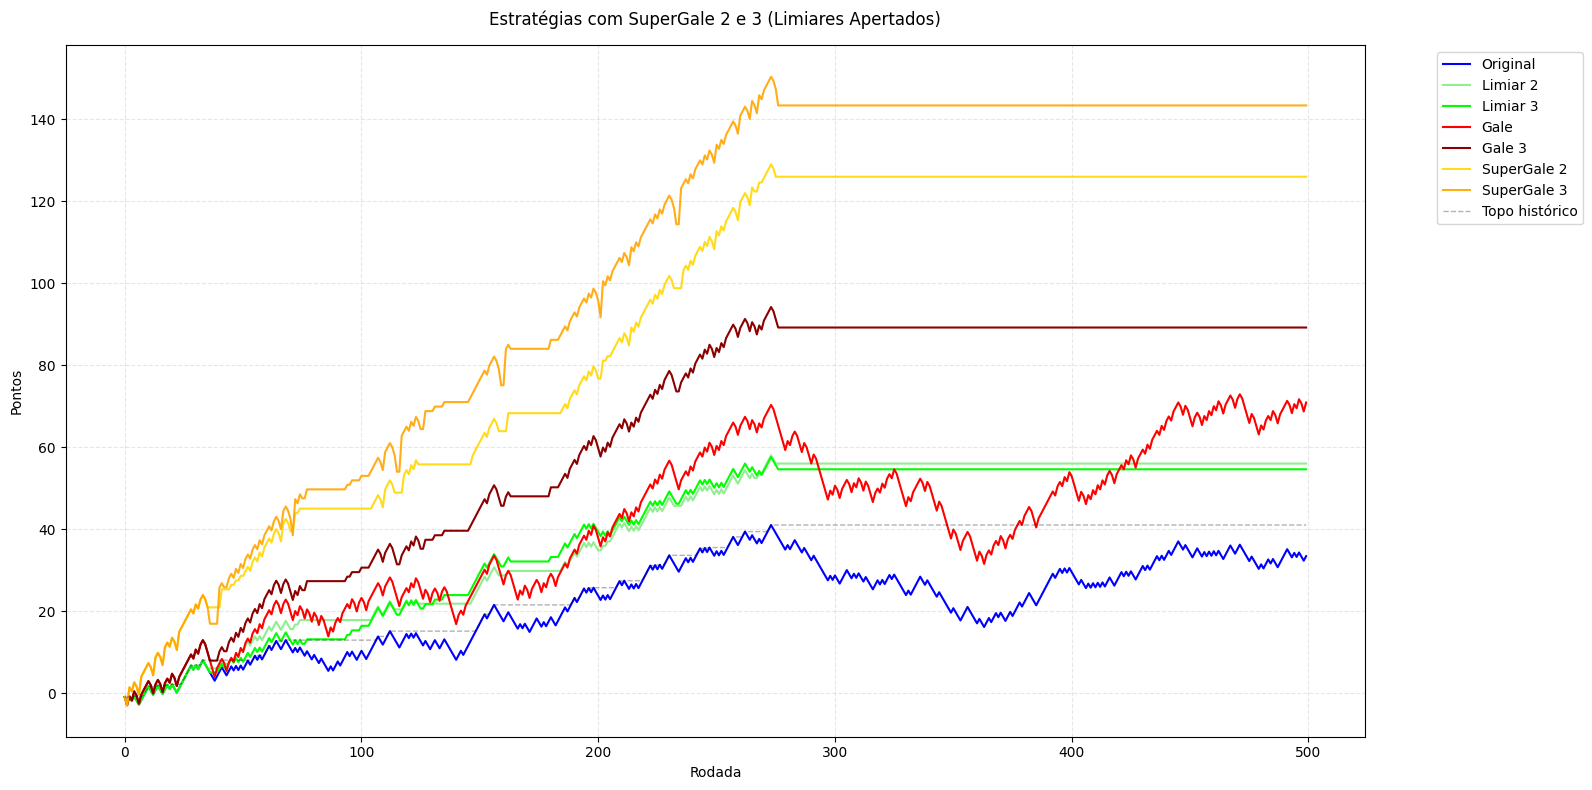

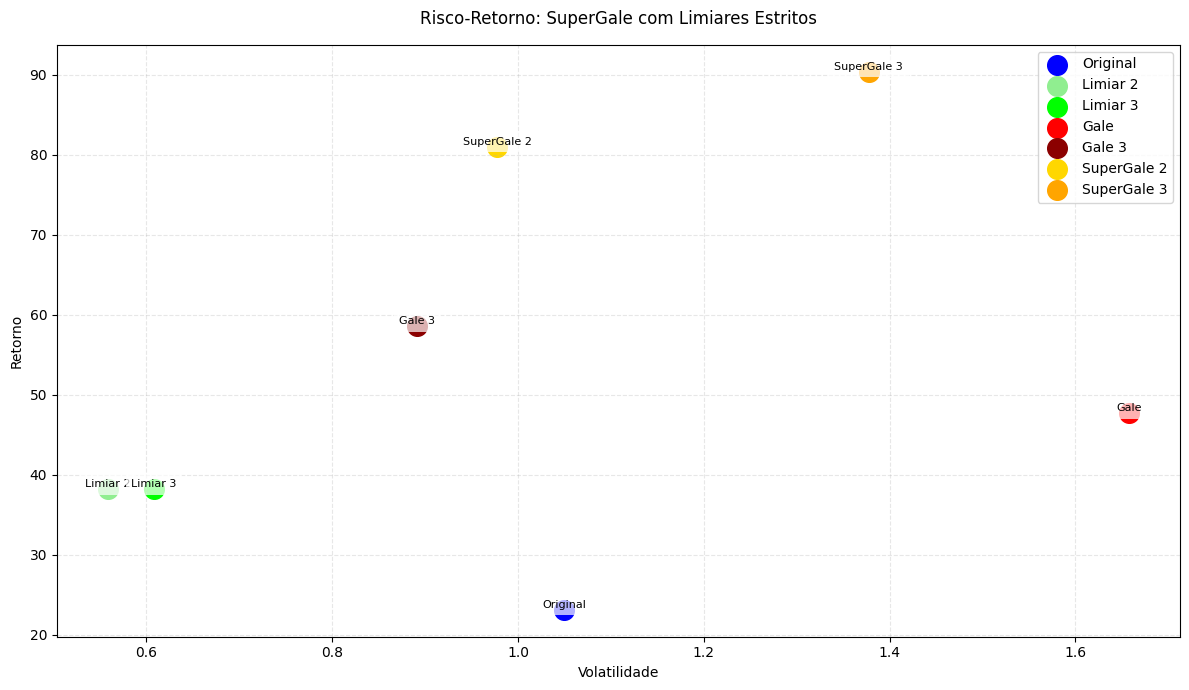

In [15]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 500
ponto_cara = 1.1
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

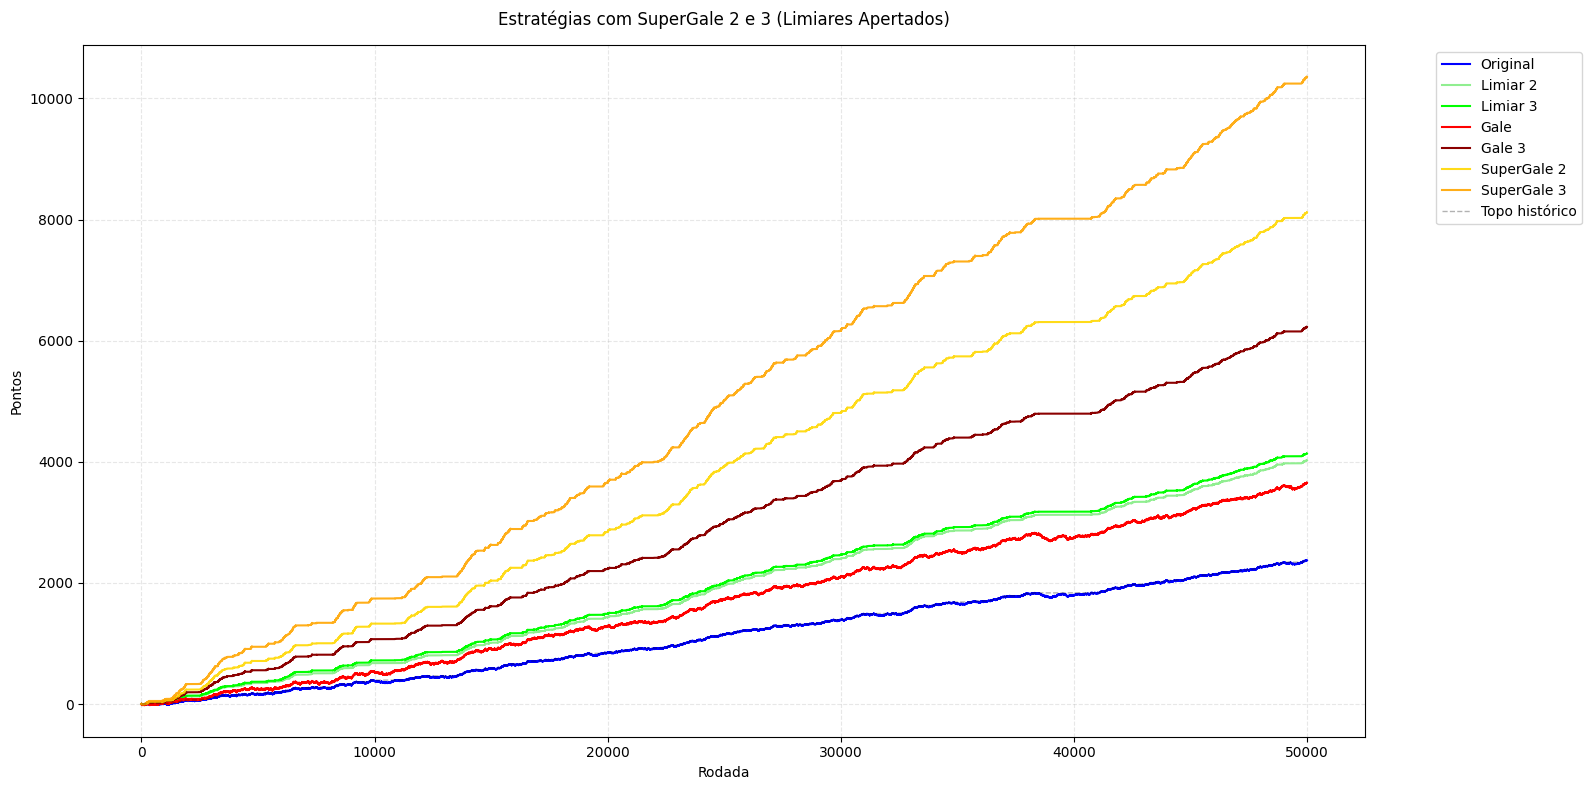

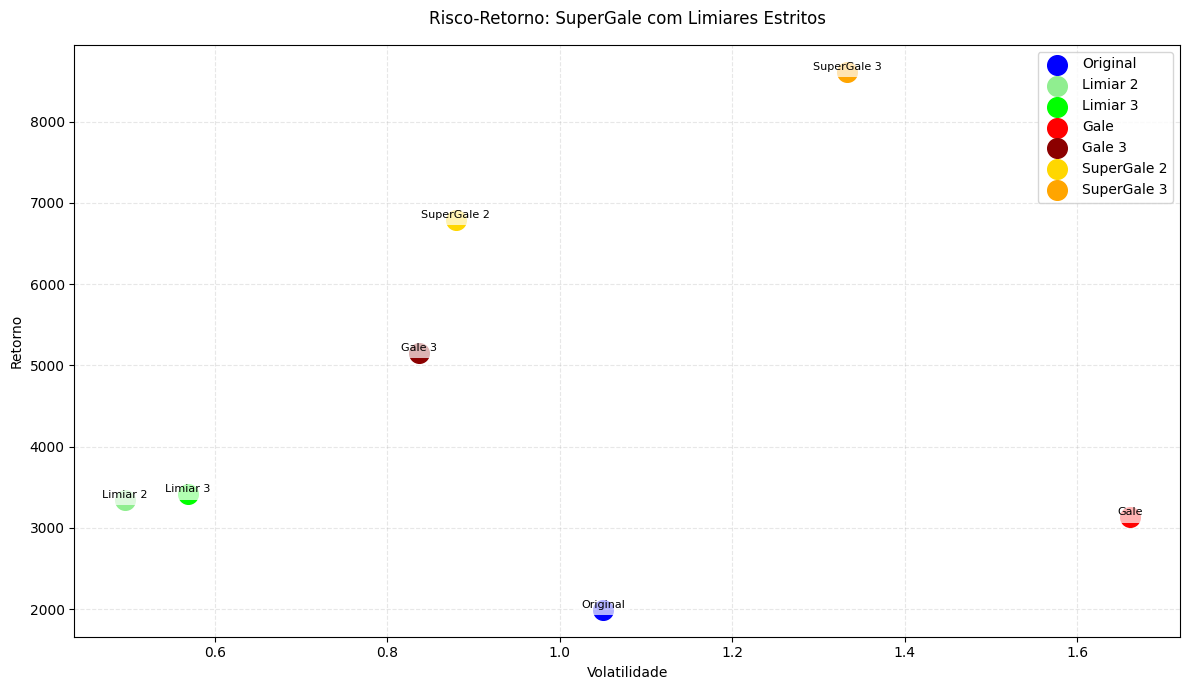

In [16]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 50000
ponto_cara = 1.1
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

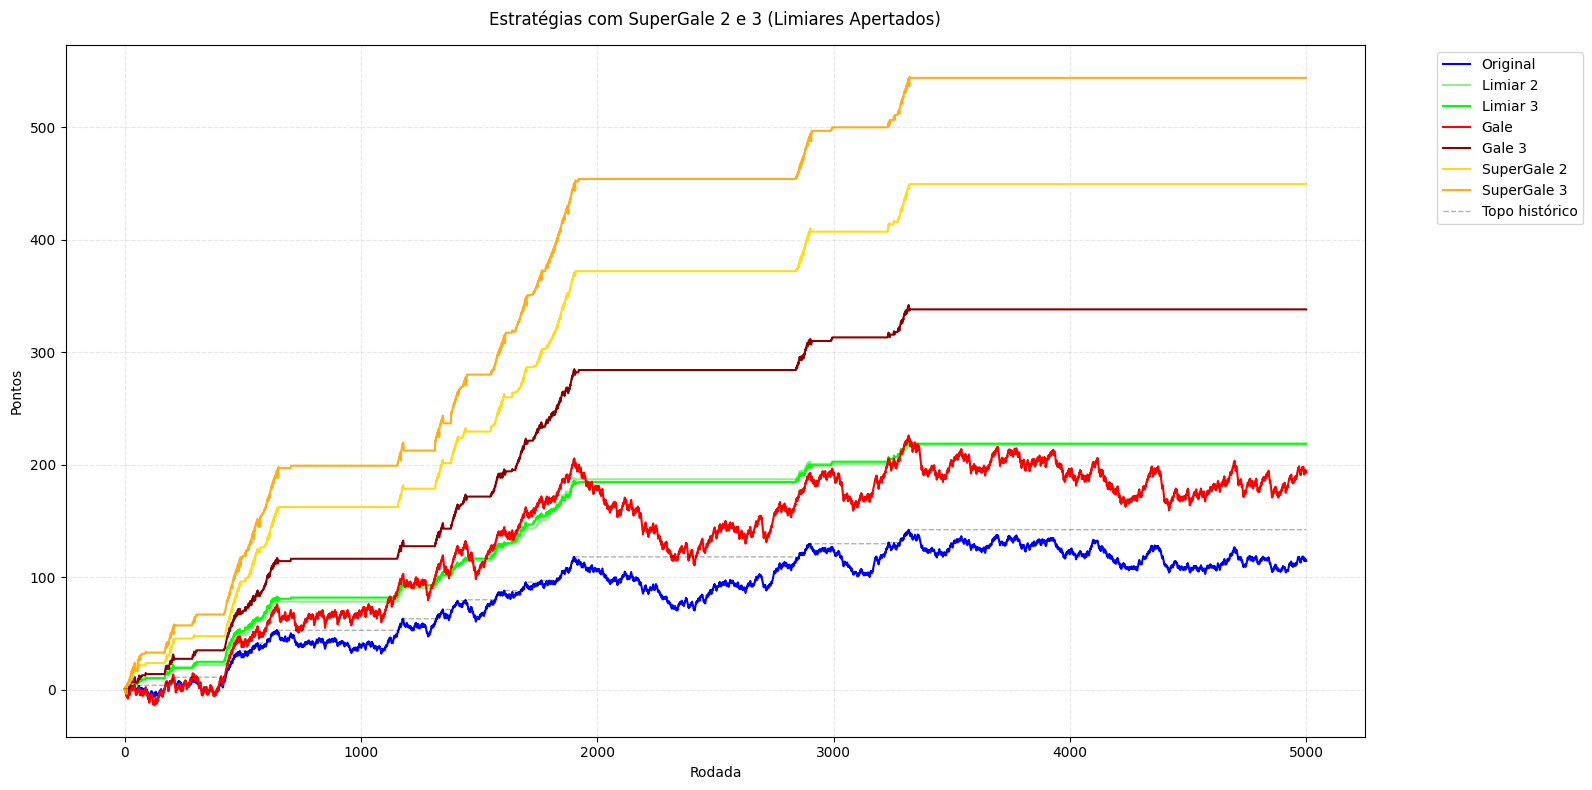

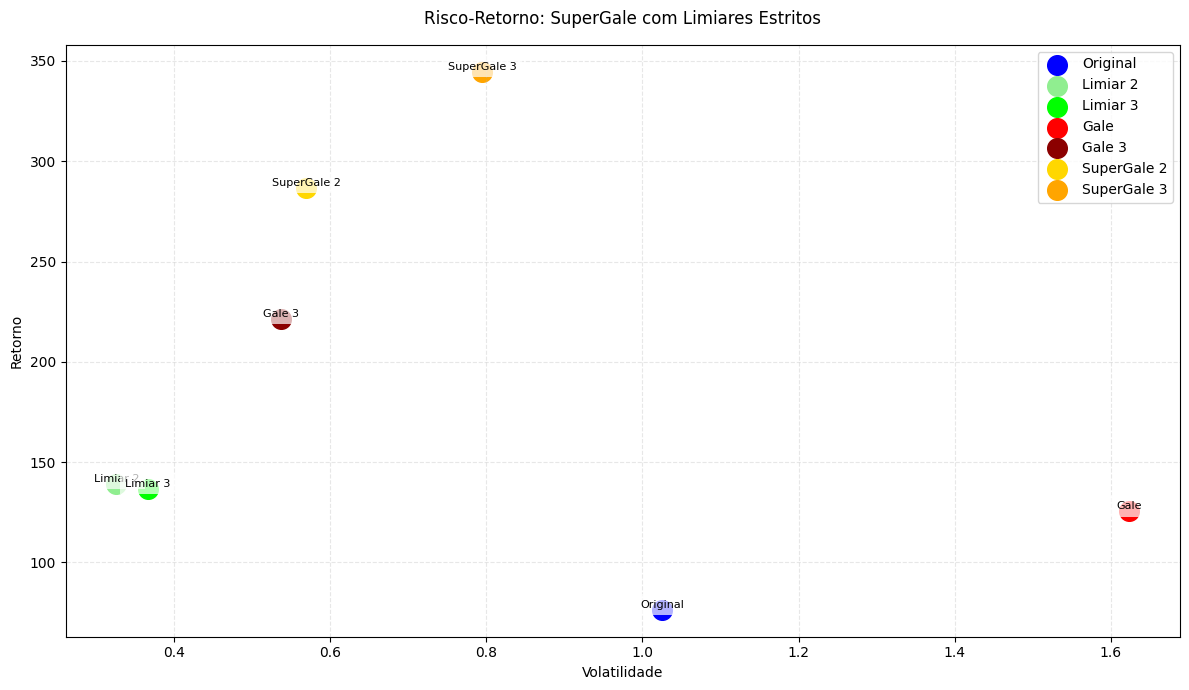

In [17]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()